In [2]:
!pwd

/home/philmart2021/seizure_prediction/SafeSeizure/notebooks


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os
%matplotlib inline

### Open each file "preictal" for patient_1 and calculate the channel (sensor) mean for each time observation

In [4]:
def get_statistics():
    '''Function that extracts the data from each .csv file in Patient_1_csv folder, 
    already downsampled by a factor of 100'''
   
  
    # Reads each .csv file in patient_1 directory, calculate the mean for each file and concatenate each mean
    # into a new database

    temp = []
    for index in tqdm(range(1, 19)): #18 files here
        temp_df = pd.read_csv(os.path.join(os.getcwd(),f'../SafeSeizure/data/Patient_1_csv/preictal_segment_{index}.csv'))
        mean_values = temp_df.mean(axis=0)
        temp.append(mean_values)
    
    return pd.concat(temp, axis=1)

In [5]:
df_average = get_statistics()

100%|██████████| 18/18 [00:43<00:00,  2.44s/it]


In [25]:
# display of the new average value dataset
df_average

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,39584.662120,7765.782241,-6342.114820,-21926.421639,-21317.503244,11830.143499,-143.860388,-163.533607,254.509298,18.270398,-196.880923,-31.998133,-135.504035,-418.866354,117.092627,396.522671,136.453575,141.173471
1,-5081.996748,-3180.714290,2978.220921,3780.692730,3987.523888,-22358.535928,-101.424110,-207.061679,-11.128980,23.884829,-191.322783,-42.879383,-156.308551,-448.680050,97.496618,349.955552,143.951605,131.657297
2,7089.236527,-1297.516358,-742.504416,-595.182429,-2819.178780,-19158.984662,-126.018541,-215.806795,60.456069,19.710271,-183.853852,-55.593375,-131.445153,-384.666921,93.499745,366.928713,196.018801,132.075971
3,3452.960436,61.641434,1265.105905,20.151857,123.167623,-21517.614350,-172.322643,-164.679746,75.604415,26.372431,-197.034244,-68.702551,-112.699060,-347.057256,108.719343,390.156542,224.979746,119.890120
4,4294.468107,-803.320512,141.803760,892.044040,-754.406547,-21672.038445,-134.738948,-157.299506,51.023128,4.044737,-195.956411,-74.692647,-129.545889,-377.546300,85.678610,391.456124,165.958364,133.341617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1104.290317,650.773251,-601.833987,-278.098011,1342.897724,-21876.230282,-1.809212,-55.021868,-182.433412,-106.564742,-76.168013,177.439401,24.672884,-12.013451,-22.067968,-20.940611,160.754416,291.695229
29996,-1468.319740,1823.789556,-669.194542,1139.741024,671.381618,-21008.443234,22.676070,-61.183975,-183.603389,-110.549918,-87.435822,158.819343,59.580304,-50.613183,-35.685942,21.855313,159.167973,311.237919
29997,-17095.178491,-1389.765039,-671.129885,-2761.773396,-610.783348,-20001.237167,34.135173,-36.289041,-182.247281,-121.076137,-54.162538,163.106511,49.953542,-74.815799,-60.141458,41.199696,161.318432,285.724279
29998,-11053.449315,4414.690279,-701.454476,4142.242305,-2542.174937,-19451.694057,-1.834816,-30.228296,-184.752060,-115.333296,-23.557272,161.882542,83.025003,-65.468754,-28.174790,11.894072,176.894806,286.371324


### Calculate simple moving average (SMA)

In [27]:
# calculate the moving average on preictal segment_4 file and add the column SMA_150 (window = 150)
df_average['SMA_150'] = df_average.iloc[:,3].rolling(window=150).mean()


In [33]:
# display of the new average value dataset and the new column SMA_150
df_average.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,SMA_150
0,39584.662120,7765.782241,-6342.114820,-21926.421639,-21317.503244,11830.143499,-143.860388,-163.533607,254.509298,18.270398,-196.880923,-31.998133,-135.504035,-418.866354,117.092627,396.522671,136.453575,141.173471,NaN
1,-5081.996748,-3180.714290,2978.220921,3780.692730,3987.523888,-22358.535928,-101.424110,-207.061679,-11.128980,23.884829,-191.322783,-42.879383,-156.308551,-448.680050,97.496618,349.955552,143.951605,131.657297,NaN
2,7089.236527,-1297.516358,-742.504416,-595.182429,-2819.178780,-19158.984662,-126.018541,-215.806795,60.456069,19.710271,-183.853852,-55.593375,-131.445153,-384.666921,93.499745,366.928713,196.018801,132.075971,NaN
3,3452.960436,61.641434,1265.105905,20.151857,123.167623,-21517.614350,-172.322643,-164.679746,75.604415,26.372431,-197.034244,-68.702551,-112.699060,-347.057256,108.719343,390.156542,224.979746,119.890120,NaN
4,4294.468107,-803.320512,141.803760,892.044040,-754.406547,-21672.038445,-134.738948,-157.299506,51.023128,4.044737,-195.956411,-74.692647,-129.545889,-377.546300,85.678610,391.456124,165.958364,133.341617,NaN


In [34]:
# Check the values of moving average starting from time unit 150 to 180.
df_average['SMA_150'][150:180]

150    600.071892
151    590.809181
152    583.184517
153    574.807264
154    566.208809
155    558.153740
156    550.339626
157    544.591223
158    538.024859
159    531.062782
160    524.278197
161    516.825406
162    511.112258
163    505.526197
164    499.916214
165    494.612760
166    488.247370
167    482.601475
168    477.151836
169    471.509592
170    465.588864
171    458.812764
172    454.008537
173    448.433975
174    441.476257
175    435.714988
176    427.744333
177    422.673908
178    416.848603
179    410.379755
Name: SMA_150, dtype: float64

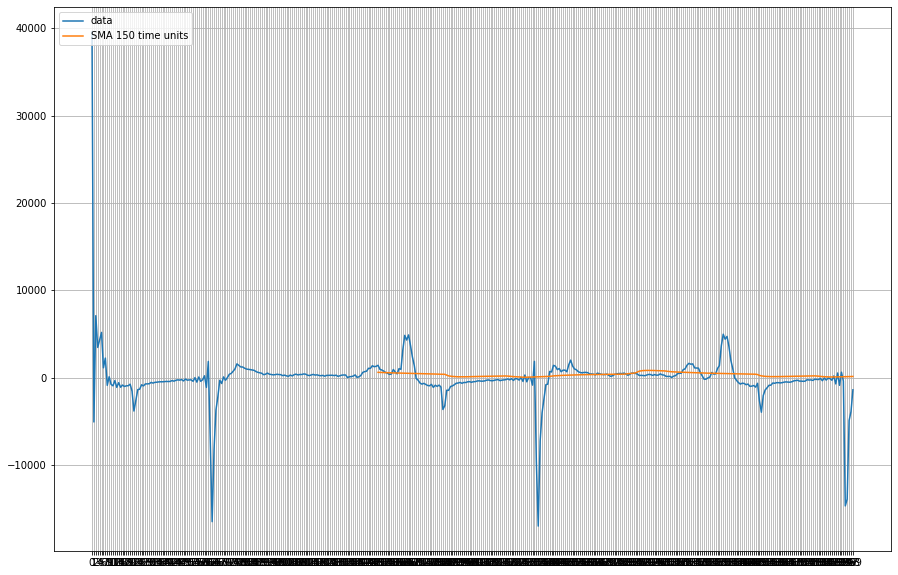

In [37]:
# plot the datasets moving average and the file preictal_segment_4 from 0 to 400 time units. Moving average has been set with a window of 150 time units.
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_average.iloc[:400, 0],label='data')
plt.plot(df_average['SMA_150'][150:400],label='SMA 150 time units')
plt.legend(loc=2)

In [38]:
# split into train and test sets
X = df_average[[3,'SMA_150']].values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [39]:
# Determine the mean square error
test_score = mean_squared_error(test_y, test_X)
print('Test MSE: %.3f' % test_score)

Test MSE: 1883657.450


In [40]:
# check the difference between MSE from moving average model and lagged baseline dataset for same preictal segment file
test_score - 550412

1333245.4500794369